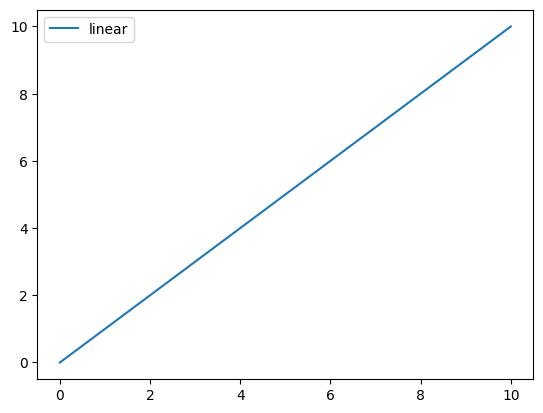

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

x = np.linspace(0,10,100)
plt.plot(x,x,label='linear')
plt.legend()
plt.show()

In [2]:
dataset = pd.read_csv("../../.data/raw_data/top2018.csv")
dataset

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0


In [3]:
dataset.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [4]:
dataset.shape

(100, 16)

In [5]:
dataset.dropna(inplace=True)
dataset.shape
y = np.array(dataset.iloc[:,3])
y

array([0.754, 0.74 , 0.587, 0.739, 0.835, 0.68 , 0.816, 0.791, 0.836,
       0.626, 0.765, 0.511, 0.586, 0.851, 0.753, 0.698, 0.699, 0.595,
       0.921, 0.922, 0.653, 0.903, 0.71 , 0.596, 0.762, 0.825, 0.708,
       0.642, 0.872, 0.599, 0.884, 0.737, 0.556, 0.592, 0.726, 0.56 ,
       0.637, 0.72 , 0.669, 0.694, 0.748, 0.791, 0.834, 0.605, 0.777,
       0.747, 0.704, 0.601, 0.656, 0.489, 0.88 , 0.687, 0.698, 0.755,
       0.776, 0.931, 0.687, 0.752, 0.732, 0.791, 0.697, 0.912, 0.797,
       0.622, 0.52 , 0.602, 0.681, 0.631, 0.799, 0.841, 0.663, 0.801,
       0.735, 0.909, 0.589, 0.67 , 0.63 , 0.792, 0.814, 0.876, 0.351,
       0.815, 0.908, 0.754, 0.587, 0.722, 0.798, 0.855, 0.775, 0.909,
       0.781, 0.964, 0.752, 0.284, 0.734, 0.684, 0.638, 0.552, 0.258,
       0.553])

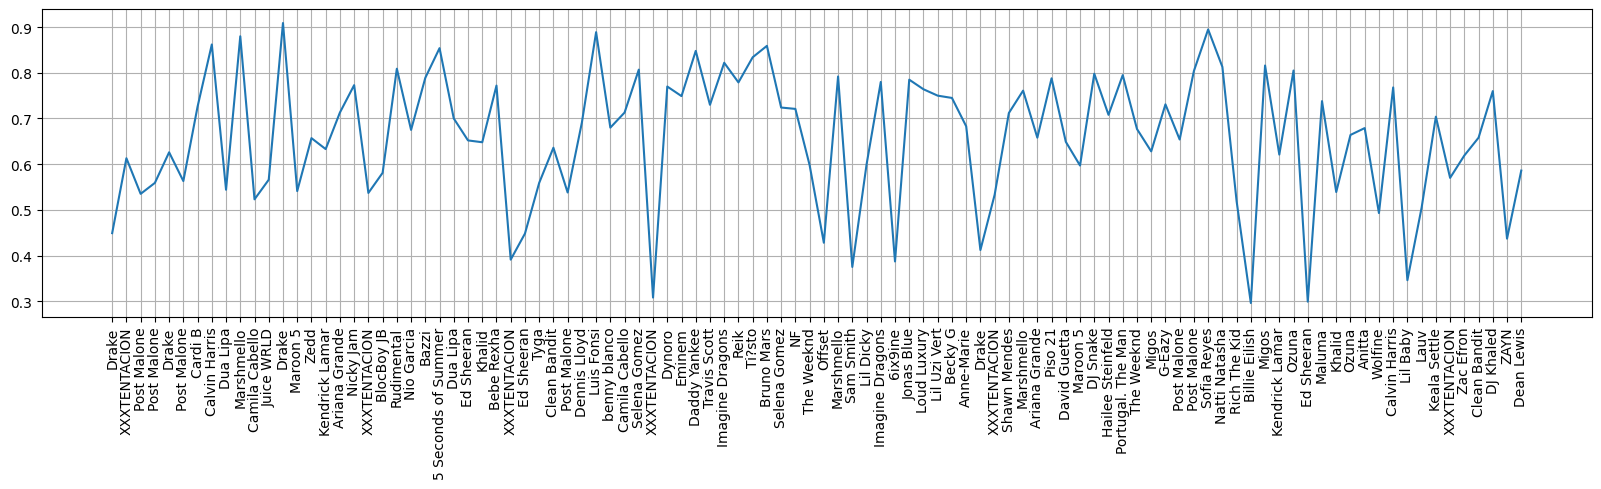

In [9]:
x = list(range(100))
y = np.array(dataset.iloc[:,4])
my_xticks = dataset.iloc[:,2]

plt.figure(figsize=(20,4))
plt.xticks(x, my_xticks, rotation="vertical")
plt.grid(True)
plt.plot(x,y)
plt.show()


In [16]:
X = dataset.iloc[:,[2,3,5,8,9]]
X

,artists,danceability,key,speechiness,acousticness
0,Drake,0.754,7.0,0.1090,0.0332
1,XXXTENTACION,0.740,8.0,0.1450,0.2580
2,Post Malone,0.587,5.0,0.0898,0.1170
3,Post Malone,0.739,8.0,0.1170,0.5800
4,Drake,0.835,1.0,0.1250,0.0589
...,...,...,...,...,...
95,Zac Efron,0.684,10.0,0.0386,0.0716
96,Clean Bandit,0.638,3.0,0.0456,0.2450
97,DJ Khaled,0.552,0.0,0.3420,0.0733
98,ZAYN,0.258,11.0,0.0390,0.1010


In [28]:
np.array(X.iloc[:,0])

array(['Drake', 'XXXTENTACION', 'Post Malone', 'Post Malone', 'Drake',
       'Post Malone', 'Cardi B', 'Calvin Harris', 'Dua Lipa',
       'Marshmello', 'Camila Cabello', 'Juice WRLD', 'Drake', 'Maroon 5',
       'Zedd', 'Kendrick Lamar', 'Ariana Grande', 'Nicky Jam',
       'XXXTENTACION', 'BlocBoy JB', 'Rudimental', 'Nio Garcia', 'Bazzi',
       '5 Seconds of Summer', 'Dua Lipa', 'Ed Sheeran', 'Khalid',
       'Bebe Rexha', 'XXXTENTACION', 'Ed Sheeran', 'Tyga', 'Clean Bandit',
       'Post Malone', 'Dennis Lloyd', 'Luis Fonsi', 'benny blanco',
       'Camila Cabello', 'Selena Gomez', 'XXXTENTACION', 'Dynoro',
       'Eminem', 'Daddy Yankee', 'Travis Scott', 'Imagine Dragons',
       'Reik', 'Ti?sto', 'Bruno Mars', 'Selena Gomez', 'NF', 'The Weeknd',
       'Offset', 'Marshmello', 'Sam Smith', 'Lil Dicky',
       'Imagine Dragons', '6ix9ine', 'Jonas Blue', 'Loud Luxury',
       'Lil Uzi Vert', 'Becky G', 'Anne-Marie', 'Drake', 'XXXTENTACION',
       'Shawn Mendes', 'Marshmello', 'Ari

In [31]:
LabelEncoderX = LabelEncoder()
X.iloc[:,0] = LabelEncoderX.fit_transform(X.iloc[:,0])
X

,artists,danceability,key,speechiness,acousticness
0,21,0.754,7.0,0.1090,0.0332
1,65,0.740,8.0,0.1450,0.2580
2,52,0.587,5.0,0.0898,0.1170
3,52,0.739,8.0,0.1170,0.5800
4,21,0.835,1.0,0.1250,0.0589
...,...,...,...,...,...
95,67,0.684,10.0,0.0386,0.0716
96,14,0.638,3.0,0.0456,0.2450
97,15,0.552,0.0,0.3420,0.0733
98,66,0.258,11.0,0.0390,0.1010


In [40]:
# ERRO: https://stackoverflow.com/questions/60470509/sklearn-dummy-variables-for-label-encoded-categorical-values
# onehotencoder = OneHotEncoder(categories=[0])
# X = onehotencoder.fit_transform(X).toarray()

Y = pd.get_dummies(X.iloc[:,0])
Y

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
y_train

array([0.679, 0.387, 0.78 , 0.657, 0.636, 0.909, 0.649, 0.626, 0.713,
       0.731, 0.539, 0.809, 0.805, 0.493, 0.854, 0.586, 0.505, 0.664,
       0.712, 0.296, 0.449, 0.538, 0.895, 0.648, 0.738, 0.721, 0.541,
       0.428, 0.795, 0.813, 0.807, 0.848, 0.628, 0.559, 0.299, 0.749,
       0.598, 0.726, 0.658, 0.391, 0.566, 0.346, 0.704, 0.7  , 0.654,
       0.633, 0.68 , 0.375, 0.76 , 0.533, 0.652, 0.621, 0.437, 0.708,
       0.535, 0.724, 0.859, 0.798, 0.834, 0.75 , 0.862, 0.804, 0.597,
       0.683, 0.619, 0.691, 0.412, 0.772, 0.675, 0.57 , 0.544, 0.88 ,
       0.448, 0.816, 0.789, 0.599, 0.792, 0.713, 0.77 , 0.563])